In [2]:
import matplotlib
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
%matplotlib notebook

# Для начала проведём исследование характеристик

<IPython.core.display.Javascript object>


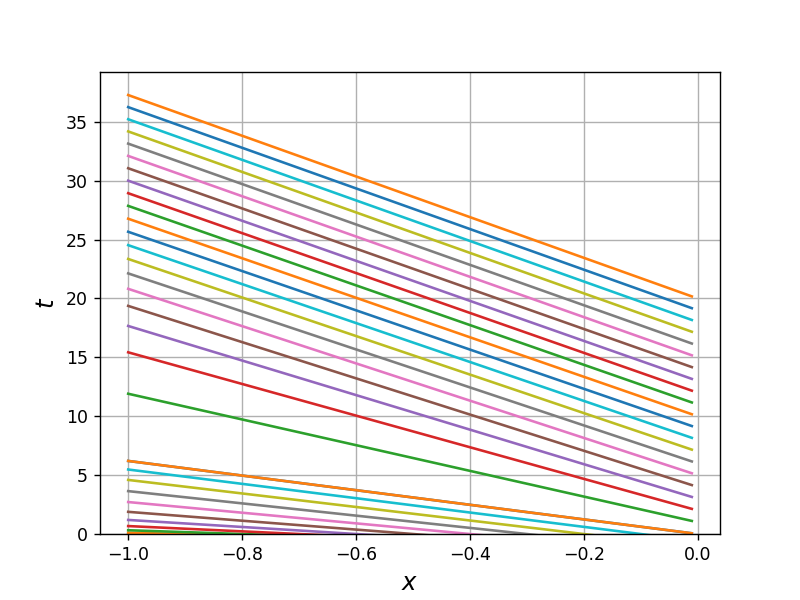

In [3]:
def u1(x: float) -> float:
    return np.cos(np.pi * x / 2)

def u2(t: float) -> float:
    return np.arctan(t) / 2 + 1

def f(u: float) -> float:
    return - (1 + (2*u + 1 + np.sin(u))**2) / (2 + np.cos(u))

x_rng = np.arange(-1, 0, 0.01)
x0 = -1
t0 = 0

while x0 <= 0:
    plt.plot(x_rng, f(u1(x0))*(x_rng-x0))
    x0 += 0.1
    
while t0 <= 20:
    plt.plot(x_rng, f(u2(t0))*x_rng + t0)
    t0 += 1

plt.xlabel(r'$x$', fontsize = 14)
plt.ylabel(r'$t$', fontsize = 14)
plt.grid(True)
plt.ylim(bottom = 0)

plt.show()

Видно, что характеристики в области рассмотрения не пересекаются, так что можем решать задачу при любых временах и решение будет определено однозначно.

# Построим разностную схему

<IPython.core.display.Javascript object>


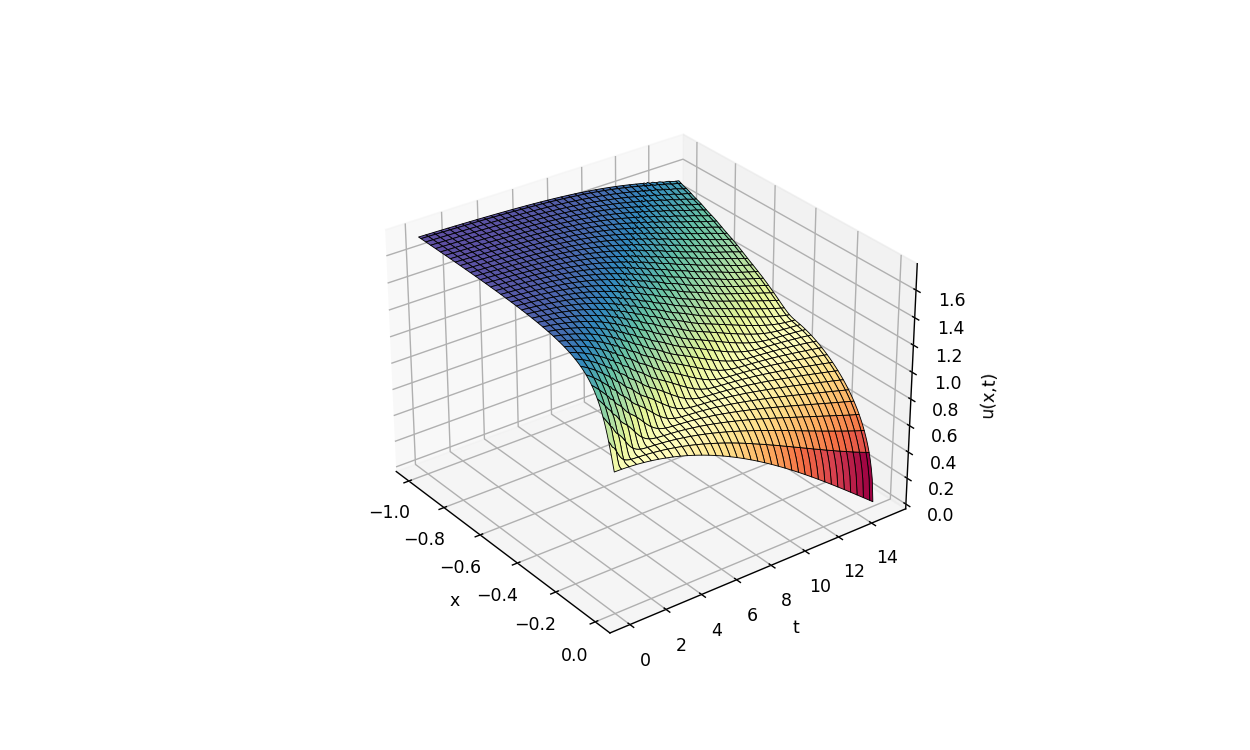

In [4]:
# Начальное и конечное значения x и t, кол-во шагов:
x1 = 0
x2 = -1
t1 = 0
t2 = 15
N = 150
M = 150

# Шаги по координате и времени и точность определения корня y[i+1][j+1]
h = (x2 - x1) / N
tau = (t2 - t1) / M
eps = 1.0e-6

# Создаём массив из нулей 
y = np.zeros((N+1,M+1))
x_i = 0
t_j = 0

# Заполняем массив начальными и граничными значениями в сетке 
for i in range(N+1):
    y[i][0] = u1(x_i)
    x_i += h

for j in range(M+1):
    y[0][j] = u2(t_j)
    t_j += tau

# Определяем функцию, которая стоит в уравнении, определяем функцию для поиска y[i][j] и её производную
def v(u: float) -> float:
    return - np.arctan(np.sin(u) + 2*u + 1)

def Fij(y_ij, y_i1j, y_ij1, y_i1j1):
    return (y_ij1 - y_ij + y_i1j1 - y_i1j) / (2 * tau) + (v(y_i1j) - v(y_ij) + v(y_i1j1) - v(y_ij1)) / (2 * h)    

def derFij (y_ij, y_i1j, y_ij1, y_i1j1):
    return 1 / (2 * tau) - (2 + np.cos(y_i1j1)) / (1 + (2*y_i1j1 + 1 + np.sin(y_i1j1))**2) / (2 * h)

# Функция для поиска корня уравнения, то есть для поиска y[i][j]
def RootOfEq(y_ij, y_i1j, y_ij1, y0):
    dy = - Fij(y_ij, y_i1j, y_ij1, y0) / derFij(y_ij, y_i1j, y_ij1, y0)
    while abs(dy) > eps:
        y0 += dy
        dy = - Fij(y_ij, y_i1j, y_ij1, y0) / derFij(y_ij, y_i1j, y_ij1, y0)
    return y0

# Заполнение массива
for j in range (M):
    for i in range(N):
        y[i+1][j+1] = RootOfEq(y[i][j], y[i+1][j], y[i][j+1], 0)

# Построение графика
x = np.arange(x1, x2 + h, h)
t = np.arange(t1, t2 + tau, tau)

fig = plt.figure(figsize = (10,6))
ax_3d = fig.add_subplot(projection='3d')

xgrid, tgrid = np.meshgrid(x, t)

ax_3d.set_xlabel('x')
ax_3d.set_ylabel('t')
ax_3d.set_zlabel('u(x,t)')


ax_3d.plot_surface(xgrid, tgrid, y, cmap='Spectral', linewidth=0.5, edgecolors='k')
plt.show()